<a href="https://colab.research.google.com/github/yonatanlou/study_projects/blob/main/Statistics_lab/labs/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2




### Loadin the data from the web

In [ ]:
# Import modules 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt
pd.get_option("display.max_columns")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
url = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/Statistical_learning_and_data%20analysis/votes_per_ballot_2021.csv"
votes_per_ballot = pd.read_csv(url,  encoding = 'iso-8859-8', index_col='שם ישוב')

In [ ]:
data_url = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/Statistical_learning_and_data%20analysis/votes_per_city_2021.csv"
df_2021_raw = pd.read_csv(data_url, encoding = 'iso-8859-8', index_col='שם ישוב')

In [ ]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
METADATA = df_2021[df_2021.columns[:5]]
df = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns


In [ ]:
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()

,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,1220,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN
אדירים,113,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN
אושה,278,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
אחווה,1157,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN
איבים,338,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN


### Q1

We need to find our constant multiplier that will be used to scale the points size based on the 'בזב'. We will want the settelment with the largest value to get point size of 200.

In [ ]:
parties_dict ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

In [ ]:
print(df_2021_raw['בזב'].max())
print(df_2021_raw['בזב'].idxmax())

439193
תל אביב  יפו


In [ ]:
multiplier = 200/df_2021_raw['בזב'].max()

Using Seaborn we will only need the min and max values, together with the 'בזב',to normalize the plot's points sizes

In [ ]:
def two_parties_scatter(df, party1, party2,size=METADATA['בזב'] * multiplier):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city
    fig = plt.gcf()
    fig.set_size_inches(15.5, 7.5)
    plt.scatter(party_share1, party_share2, s=size)  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter for two parties ' )
    plt.show()


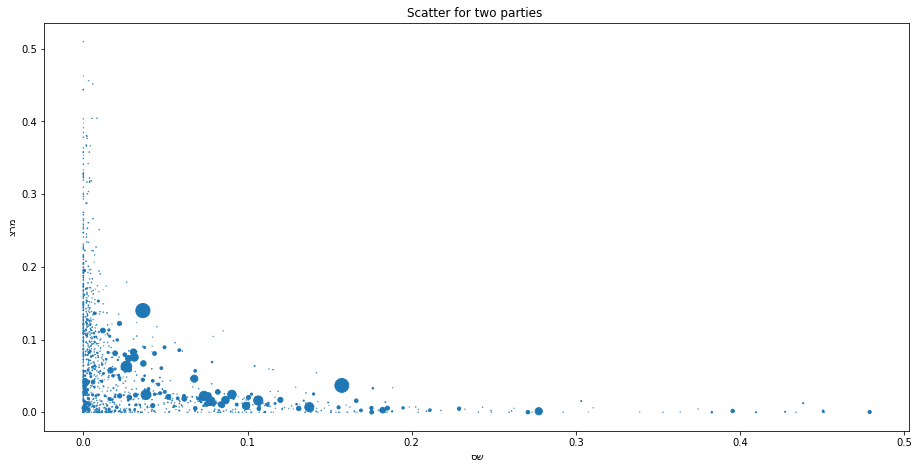

In [ ]:
two_parties_scatter(df, 'שס', 'מרצ')

As expected, for this 2 parties, who are really distanced in terms of political idelogy, the scatter plot recives almost an L shape figure, this means that in most of the cities the did vote them there are no representation of the 2 parties.
We can see that the 2 big cities in israel, Jerusalem and Tel Aviv (most likely)are also pretty much side decided. Can you guess which one is which ?

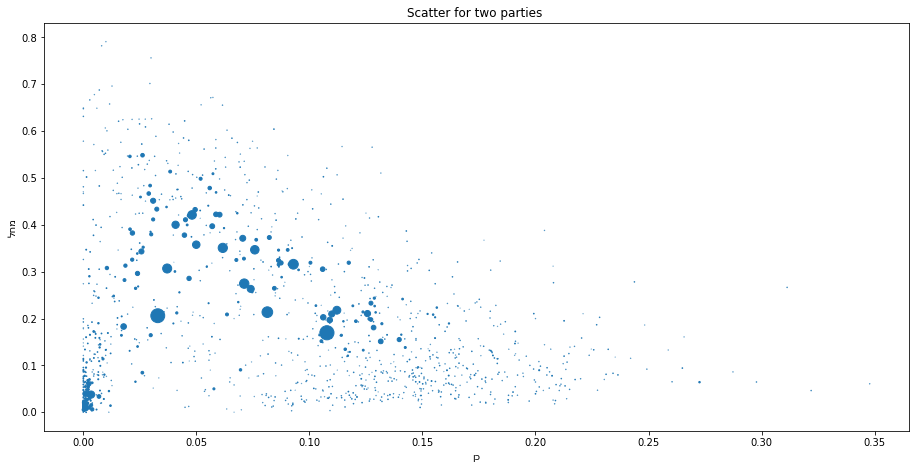

In [ ]:
two_parties_scatter(df, 'כן', 'מחל')

Here the picture is much more complicated, as expected for the 2 largers parties. We still can spot that in most of the big cities Likud got a bigger share of vote in comparison to Kahol-Lavan.

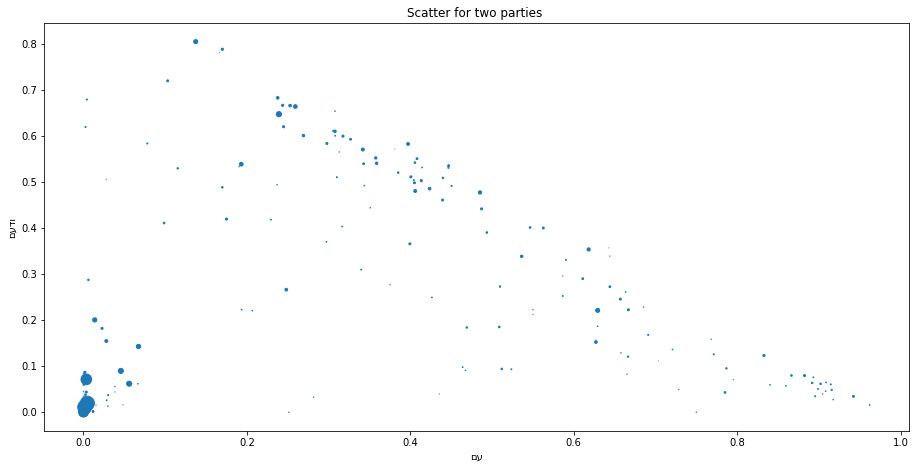

In [ ]:
two_parties_scatter(df, 'עם', 'ודעם')

This one is interesting. As expected, in most of the cities there are no voters at all, but lets look at the ones that did vote. Firstly we can see that thae share of voters in those places are really hight, plus the 2 together represent almost 100% of the voters in those cities. Let's take a look at the voting trend, it seems like as the share of votes to one party increases the other's decreases, meaning that those cities are pretty much decided. or maybe just misrepresented and voting to their defualt choice between the 2 ?

### Q2

We will use the METADATA df together with some calculation to find the 13 parties the actually won a seat in the knesset. We will then, using the METADATA data agian, will calculated for each of the chosen parties, for each settlement (will be called city from now on for simplicty reasons),it's relative voting rate. The spearman correlation will be calculated based on this dataFrame and be plotted usuing the same function from class.

In [ ]:
kosher = METADATA['כשרים'].sum()

In [ ]:
isInKnesset = (df.sum(axis=0)/kosher > 0.035).to_dict()
inKnessetParties = [i for i in isInKnesset.keys() if isInKnesset[i] is True]
votes_per_city = df.sum(axis=1)

In [ ]:
knesset_parties = df[inKnessetParties]

In [ ]:
kosher_per_city = METADATA['כשרים'].to_numpy()

In [ ]:
knesset_parties = knesset_parties/ kosher_per_city[:, None]

We were asked to order the correlation matrix, firstly with respect to the parties size and secondly ordering them form left to right (politically).

In [ ]:
parties_dict

{'אמת': 'עבודה',
 'ב': 'ימינה',
 'ג': 'יהדות התורה',
 'ודעם': 'הרשימה המשותפת',
 'ט': 'הציונות הדתית',
 'כן': 'כחול לבן',
 'ל': 'ישראל ביתנו',
 'מחל': 'הליכוד',
 'מרצ': 'מרצ',
 'עם': 'רעם',
 'פה': 'יש עתיד',
 'שס': 'שס',
 'ת': 'תקוה חדשה'}

In [ ]:
size_order = (df.sum(axis=0)/kosher).sort_values(ascending=False)[:13].keys().to_list()
political_order = ['עם', 'ודעם', 'מרצ', 'אמת', 'פה', 'כן', 'ת', 'ל', 'מחל', 'שס', 'ג', 'ב', 'ט']

In [ ]:
knesset_parties[size_order].corr(method='spearman')

,מחל,פה,שס,כן,ב,אמת,ג,ל,ט,ודעם,ת,מרצ,עם
מחל,1.000,-0.155,0.651,-0.097,0.529,-0.323,0.393,0.079,0.557,-0.342,0.409,-0.462,-0.165
פה,-0.155,1.000,-0.419,0.820,-0.115,0.798,-0.296,0.622,-0.372,-0.037,0.448,0.723,-0.315
שס,0.651,-0.419,1.000,-0.348,0.359,-0.516,0.539,-0.151,0.575,-0.240,0.073,-0.584,-0.008
כן,-0.097,0.820,-0.348,1.000,-0.031,0.777,-0.292,0.533,-0.294,-0.126,0.452,0.655,-0.368
ב,0.529,-0.115,0.359,-0.031,1.000,-0.187,0.368,-0.026,0.748,-0.495,0.422,-0.427,-0.399
אמת,-0.323,0.798,-0.516,0.777,-0.187,1.000,-0.369,0.545,-0.420,0.002,0.292,0.840,-0.352
ג,0.393,-0.296,0.539,-0.292,0.368,-0.369,1.000,-0.086,0.572,-0.237,0.022,-0.433,-0.052
ל,0.079,0.622,-0.151,0.533,-0.026,0.545,-0.086,1.000,-0.178,0.046,0.431,0.470,-0.111
ט,0.557,-0.372,0.575,-0.294,0.748,-0.420,0.572,-0.178,1.000,-0.488,0.139,-0.601,-0.330
ודעם,-0.342,-0.037,-0.240,-0.126,-0.495,0.002,-0.237,0.046,-0.488,1.000,-0.228,0.253,0.570


In [ ]:
# Display heatmap for a correlation matrix 
# Input: 
# corr_mat - matrix of correlations 
# names - vector with names for each row/column
def heatmap_corr(corr_mat, names):
    rev_names = [parties_dict[name][::-1] for name in list(names)]
    fig, ax = plt.subplots()
    fig.set_size_inches(17, 12)
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('inferno'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names, fontsize=12, rotation=45)
    ax.set_yticklabels(rev_names, fontsize=12)
    ax.set_title("Parties pairwise correlations", fontsize=18)
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom", fontsize=14)

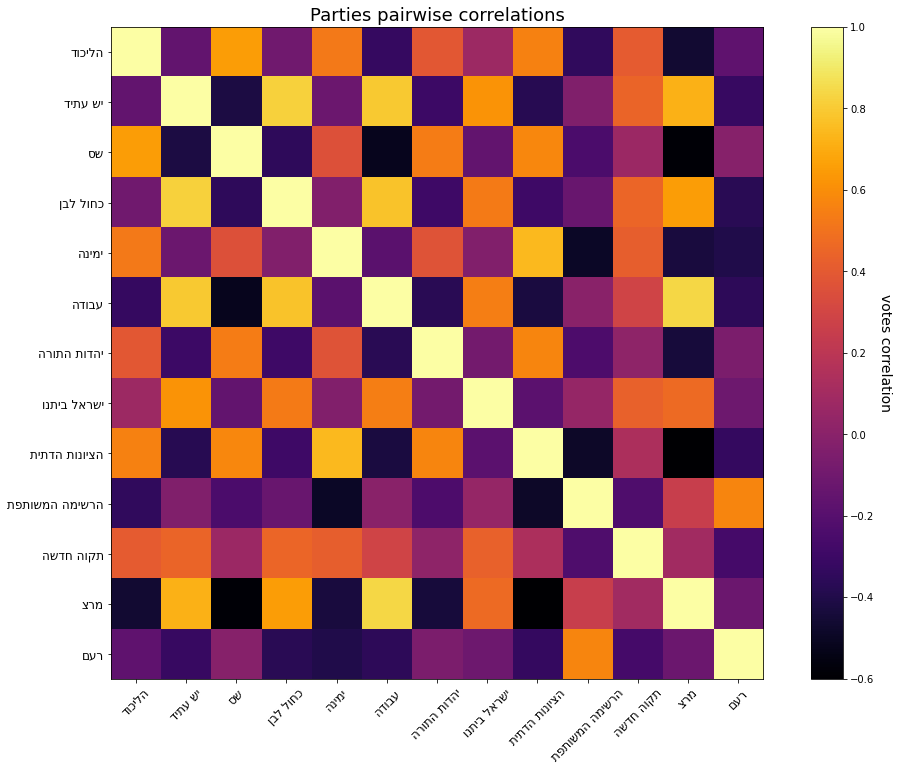

In [ ]:
heatmap_corr(knesset_parties[size_order].corr(method='spearman'), size_order)

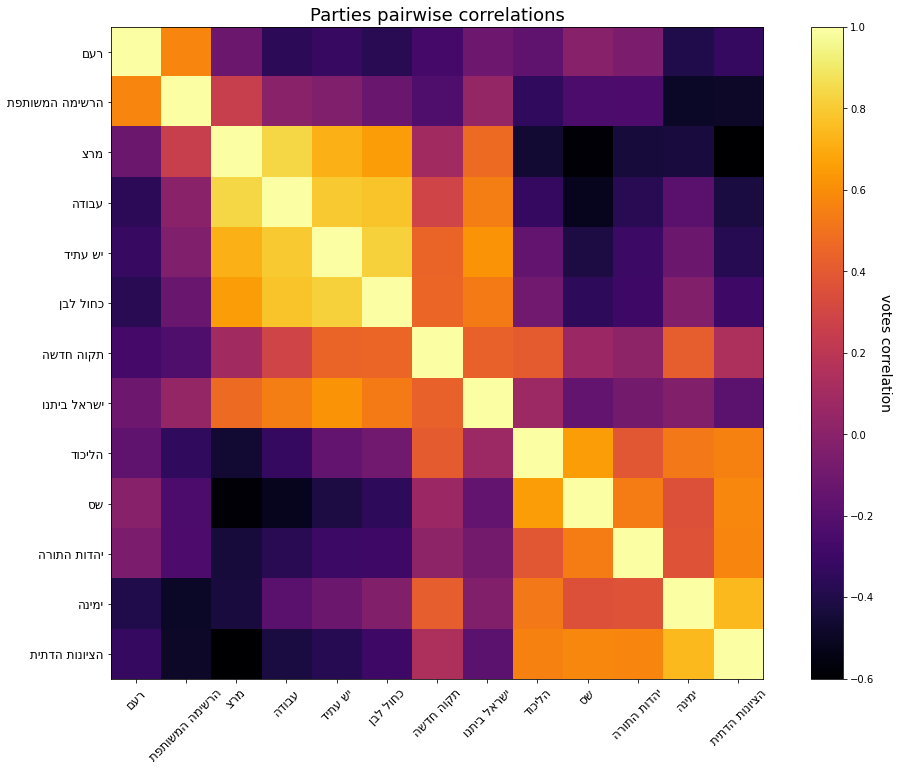

In [ ]:
heatmap_corr(knesset_parties[political_order].corr(method='spearman'), political_order)

We can see that when ordering the matrix with respect to the parties political ideology it is much easier to interpert the correaltion heatmap, Where the division into left/right parties, based on the correlation, can be clearly seen. In this representation our heatmap can be easily divided into 4 rectangles, 2 two hot spots on the main diagonal represent the political camp - highly correlated parties while the opposite diagonal represnt the correaltion between the parties in the opposite camp, those are mainly negative.
There are 2 parties that are excluded from the rest (רעמ,הרשימה המשותפת) those are highly correlated between them and negativly correalted wiht the others. As many of the voters for this two are concetrated in cities where the share of voters to one party is really hight, this outcome is not suprising.

## Q3

We already calculated the distribution of voting by city in the last question so we can use it here as well.
Firstly, we will use the voting distribution of each city to compute the predicted outcome dataframe, this will hold the estimation for the real distribution for a party in each city if every eligble voter would have voted in the election. We will achive this by multuplying each of the values (eg. voting share of a specific party i a specific city) by the corresponding number of elgible voters in the city, this will let us estimate how <b>many</b> voters would have voted (It will be fractional number which is impossible but bare with me), We will then sum the number of voters for each party and divide by the number of total eligible voters - Our "what if" estimator for the elections.

In [ ]:
real_dist = knesset_parties.copy()
real_dist

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,0.313,0.000,0.000,0.020,0.013,0.107,0.013,0.033,0.207,0.000,0.180,0.007,0.053
אדירים,0.006,0.039,0.022,0.000,0.050,0.017,0.000,0.467,0.000,0.000,0.011,0.339,0.033
אושה,0.261,0.025,0.000,0.011,0.000,0.134,0.029,0.087,0.072,0.000,0.312,0.000,0.054
אחווה,0.097,0.028,0.000,0.000,0.028,0.248,0.021,0.186,0.069,0.000,0.255,0.014,0.055
איבים,0.000,0.100,0.000,0.000,0.250,0.125,0.000,0.425,0.000,0.000,0.000,0.025,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,0.181,0.037,0.000,0.002,0.006,0.149,0.020,0.065,0.200,0.000,0.305,0.000,0.031
שורשים,0.207,0.066,0.000,0.010,0.003,0.131,0.024,0.110,0.072,0.000,0.279,0.000,0.086
שכניה,0.227,0.038,0.000,0.007,0.009,0.137,0.027,0.031,0.153,0.000,0.272,0.002,0.081


In [ ]:
predicted_dist = pd.DataFrame(columns=real_dist.columns, index=real_dist.index)

In [ ]:
elgible_per_city = METADATA['בזב'].to_numpy()
elgible_total = METADATA['בזב'].sum()
kosher_total = METADATA['כשרים'].sum()

In [ ]:
predicted_dist = real_dist * elgible_per_city[:, None]

In [ ]:
predicted_dist

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,69.247,0.000,0.000,4.420,2.947,23.573,2.947,7.367,45.673,0.000,39.780,1.473,11.787
אדירים,1.300,9.100,5.200,0.000,11.700,3.900,0.000,109.200,0.000,0.000,2.600,79.300,7.800
אושה,99.652,9.688,0.000,4.152,0.000,51.210,11.072,33.217,27.681,0.000,119.029,0.000,20.761
אחווה,17.669,5.048,0.000,0.000,5.048,45.434,3.786,34.076,12.621,0.000,46.697,2.524,10.097
איבים,0.000,13.800,0.000,0.000,34.500,17.250,0.000,58.650,0.000,0.000,0.000,3.450,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,116.008,23.462,0.000,1.303,3.910,95.153,13.035,41.711,127.739,0.000,195.519,0.000,19.552
שורשים,87.517,27.714,0.000,4.376,1.459,55.428,10.210,46.676,30.631,0.000,118.148,0.000,36.466
שכניה,140.038,23.571,0.000,4.160,5.546,84.578,16.638,19.411,94.283,0.000,167.769,1.387,49.915


In [ ]:
dist_estimator = (predicted_dist.sum(axis=0)/elgible_total)[size_order]
dist_observed = (df[inKnessetParties].sum(axis=0)/kosher_total)[size_order]

In [ ]:
def barplot(obs, est, title):
  width = 0.3  
  n = len(obs)
  names = est.keys()
  rev_names = [parties_dict[name][::-1] for name in list(names)]
  fig, ax = plt.subplots()
  fig.set_size_inches(17, 12)
  ax.set_facecolor('whitesmoke')
  ax.bar(np.arange(n), obs.to_list(), width, color='skyblue', 
        label="Observed Distribution In Election")
  ax.bar(np.arange(n) + width , est.to_list(), width, color='lightsalmon', 
        label='Estimated Distribution In Election')
  ax.set_ylabel('Votes Share', fontsize=14)
  ax.set_xlabel('Parties Names', fontsize=14)
  ax.set_title(title, fontsize=16)
  ax.set_xticks(np.arange(n))
  ax.set_xticklabels(rev_names, rotation=45)
  ax.legend()
  plt.show()

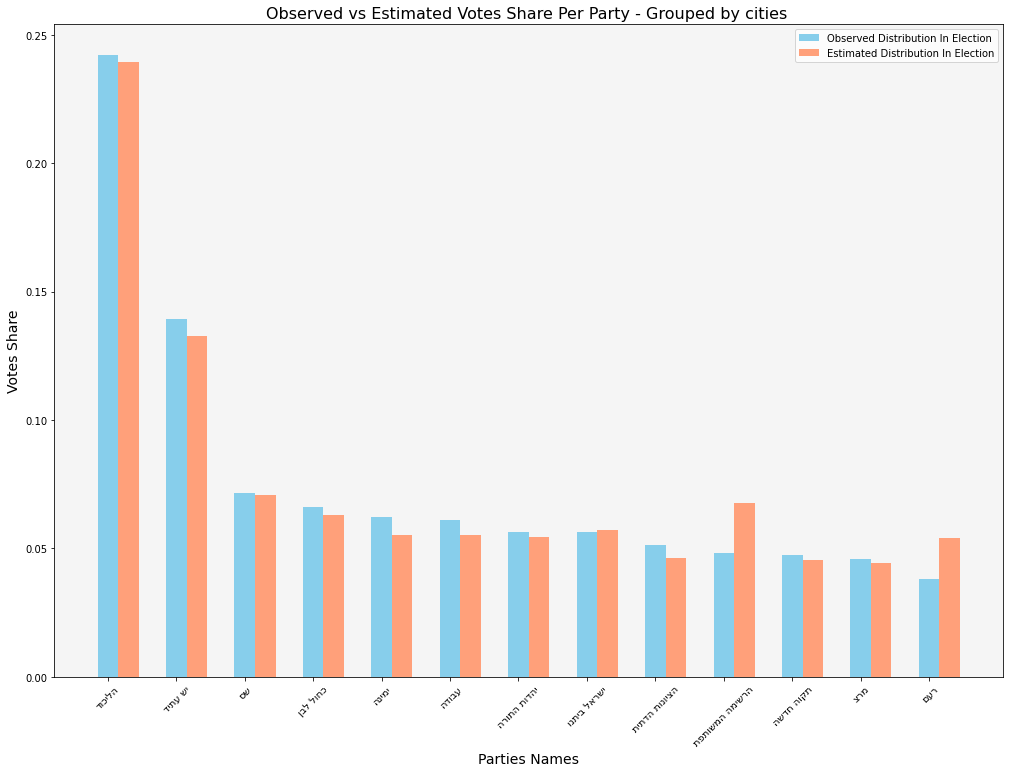

In [ ]:
barplot(dist_observed, dist_estimator, 'Observed vs Estimated Votes Share Per Party - Grouped by cities ')

Lets repeat the same process with votes per ballots data.

In [ ]:
votes_per_ballot_observed = votes_per_ballot.reset_index()[inKnessetParties]
votes_per_ballot_observed

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
0,47,0,0,3,2,16,2,5,31,0,27,1,8
1,1,7,4,0,9,3,0,84,0,0,2,61,6
2,72,7,0,3,0,37,8,24,20,0,86,0,15
3,14,4,0,0,4,36,3,27,10,0,37,2,8
4,0,4,0,0,10,5,0,17,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12921,32,81,2,7,22,30,47,141,22,4,93,16,39
12922,31,73,2,5,22,27,36,200,22,1,76,11,40
12923,43,50,8,5,22,27,74,123,19,0,96,12,47
12924,42,55,3,4,23,33,66,155,20,1,84,11,33


In [ ]:
kosher_per_ballot = votes_per_ballot.reset_index()['כשרים'].to_numpy()

In [ ]:
eligble_per_ballot = votes_per_ballot.reset_index()['בזב'].to_numpy()

In [ ]:
share_per_ballot_observed = votes_per_ballot_observed/ kosher_per_ballot[:, None]
votes_per_ballot_estimated = (share_per_ballot_observed * eligble_per_ballot[:, None])

In [ ]:
dist_est_from_ballot = (votes_per_ballot_estimated.sum(axis=0)/elgible_total)[size_order]
dist_obs_from_ballot = (votes_per_ballot_observed.sum(axis=0)/kosher_total)[size_order]

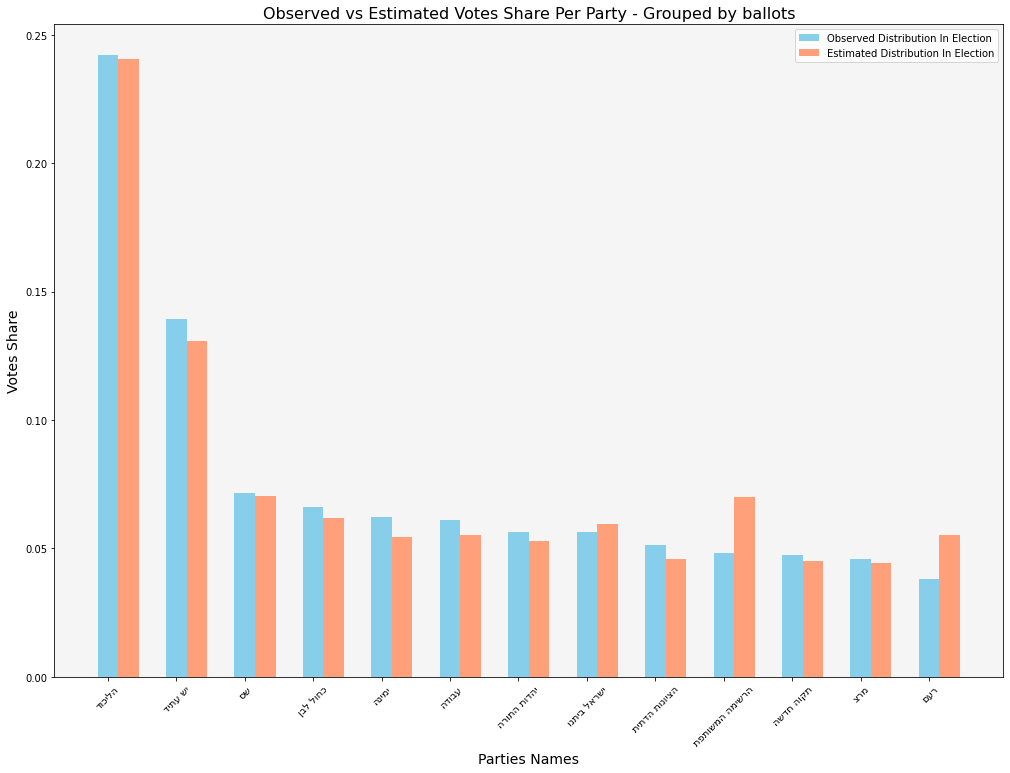

In [ ]:
barplot(dist_obs_from_ballot, dist_est_from_ballot, 'Observed vs Estimated Votes Share Per Party - Grouped by ballots')

In [ ]:
We can see 